In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import random
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [99]:
df_train = pd.read_csv('Titanic/spaceship-titanic/train.csv')
df_test = pd.read_csv('Titanic/spaceship-titanic/test.csv')
df = pd.read_csv('Titanic/spaceship-titanic/sample_submission.csv')

In [100]:
df_train = df_train.drop(['PassengerId', 'Name'], axis=1)

df_test = df_test.drop(['PassengerId', 'Name'], axis=1)

In [101]:
cabin_splited = df_train['Cabin'].str.split('/', expand=True)
df_train['Deck'] = cabin_splited[0]
df_train['Num'] = cabin_splited[1]
df_train['Side'] = cabin_splited[2]
df_train = df_train.drop('Cabin', axis=1)



cabin_splited = df_test['Cabin'].str.split('/', expand=True)
df_test['Deck'] = cabin_splited[0]
df_test['Num'] = cabin_splited[1]
df_test['Side'] = cabin_splited[2]
df_test = df_test.drop('Cabin', axis=1)

In [102]:
df_train.iloc[[1916]]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
1916,NaN,False,PSO J318.5-22,32.0,False,0.0,58.0,0.0,0.0,642.0,True,G,330,P


In [103]:
df_train.index[(df_train['HomePlanet'].isna()) & (df_train['Transported'] == False) & (df_train['CryoSleep'] == True)]

Index([1550, 1807, 2166, 2173, 2281, 2290, 2642, 3816, 7286, 7519], dtype='int64')

# filling 'HomePlanet'

In [104]:
df_train.loc[(df_train['CryoSleep'] == True) & 
(df_train['Transported'] == False) &
(df_train['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'


df_test.loc[(df_test['CryoSleep'] == True) & 
(df_test['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'

In [105]:
df_train.loc[(df_train['CryoSleep'] == True) & 
(df_train['Transported'] == True) & 
(df_train['HomePlanet'].isna()) &
(df_train['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'



df_test.loc[(df_test['CryoSleep'] == True) & 
(df_test['HomePlanet'].isna()) &
(df_test['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'

In [106]:
df_train.loc[(df_train['CryoSleep'] == False) & 
(df_train['Transported'] == False) &
(df_train['HomePlanet'].isna()) &
(df_train['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Earth'



df_test.loc[(df_test['CryoSleep'] == False) & 
(df_test['HomePlanet'].isna()) &
(df_test['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Earth'

In [107]:
df_train.loc[(df_train['CryoSleep'] == False) & 
(df_train['HomePlanet'].isna()) &
(df_train['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Europa'



df_test.loc[(df_test['CryoSleep'] == False) & 
(df_test['HomePlanet'].isna()) &
(df_test['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Europa'

In [108]:
df_train.loc[(df_train['HomePlanet'].isna()) &
(df_train['Destination'] == '55 Cancri e'), 'HomePlanet'] = 'Europa'


df_test.loc[(df_test['HomePlanet'].isna()) &
(df_test['Destination'] == '55 Cancri e'), 'HomePlanet'] = 'Europa'

In [109]:
df_train['HomePlanet'] = df_train['HomePlanet'].fillna('Mars')


df_test['HomePlanet'] = df_test['HomePlanet'].fillna('Mars')

# Filling 'CryoSleep'

In [110]:
df_train.loc[(df_train['Transported'] == True) & 
(df_train['HomePlanet'] == 'Mars'), 'CryoSleep'] = True

df_test['CryoSleep'] = df_test['CryoSleep'].map(lambda l: l if not np.isnan(l) else np.random.choice([True, False]))

In [111]:
df_train.loc[(df_train['Transported'] == False) & 
(df_train['HomePlanet'] == 'Mars'), 'CryoSleep'] = False

In [112]:
df_train.loc[(df_train['Transported'] == True) & 
(df_train['HomePlanet'] == 'Europa'), 'CryoSleep'] = True

In [113]:
df_train.loc[(df_train['Transported'] == False) & 
(df_train['HomePlanet'] == 'Europa'), 'CryoSleep'] = False

In [114]:
df_train['CryoSleep'] = df_train['CryoSleep'].map(lambda l: l if not np.isnan(l) else np.random.choice([True, False]))

In [115]:
df_train.iloc[[92, 98, 175, 721, 730, 152, 8181, 8362, 8420, 8455, 8501, 8591, 8612, 8651, 8664, 8675]]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
92,Earth,False,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,True,G,12,P
98,Earth,False,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,False,F,21,P
175,Earth,False,PSO J318.5-22,52.0,False,0.0,0.0,0.0,0.0,0.0,True,G,30,P
721,Earth,False,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,False,G,115,S
730,Earth,True,TRAPPIST-1e,54.0,False,0.0,0.0,0.0,0.0,0.0,False,G,117,S
152,Earth,False,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,True,E,11,S
8181,Earth,False,55 Cancri e,19.0,False,179.0,16.0,246.0,280.0,0.0,False,F,1802,P
8362,Earth,True,PSO J318.5-22,17.0,False,0.0,0.0,0.0,0.0,0.0,True,G,1442,S
8420,Earth,False,PSO J318.5-22,27.0,False,32.0,8.0,5.0,588.0,18.0,False,F,1844,P
8455,Earth,False,TRAPPIST-1e,51.0,False,0.0,0.0,689.0,0.0,32.0,False,G,1455,S


# Filling Destination

In [116]:
df_train.loc[(df_train['HomePlanet'] == 'Mars'), 'Destination'] = 'TRAPPIST-1e'

df_test.loc[(df_test['HomePlanet'] == 'Mars'), 'Destination'] = 'TRAPPIST-1e'

In [117]:
df_train.loc[(df_train['HomePlanet'] == 'Europa'), 'Destination'] = '55 Cancri e'

df_test.loc[(df_test['HomePlanet'] == 'Europa'), 'Destination'] = '55 Cancri e'

In [118]:
df_train['Destination'] = df_train['Destination'].map(lambda l: l if not pd.isnull(l) else np.random.choice(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], p =[0.7, 0.2, 0.1]))


df_test['Destination'] = df_test['Destination'].map(lambda l: l if not pd.isnull(l) else np.random.choice(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], p =[0.7, 0.2, 0.1]))

In [119]:
df_train.iloc[[128,  139,  430,  547,  570,  620,  686,  742,  877,  957, 1021, 1300,
       1306, 1364, 1393, 1426, 1485, 1660, 1717, 2045, 2099, 2206, 2242, 2276,
       2641, 2660, 2712, 2714, 2761, 2888, 3009, 3054, 3358, 3440, 3585, 3599,
       3616, 3639, 3731, 4050, 4075, 4128, 4371, 4381, 4403, 4485, 4543, 4639,
       4673, 4745, 4753, 4759, 4773, 4781, 4798, 4872, 4906, 4959, 5028, 5243,
       5368, 5421, 5428, 5457, 5470, 5482, 5492, 5524, 5540, 5549, 5650, 5703,
       5806, 5828, 5889, 5966, 6057, 6175, 6331, 6478, 6522, 6648, 6752, 6813,
       6958, 6980, 7156, 7178, 7195, 7213, 7403, 7647, 7730, 7780, 8038, 8085,
       8195, 8372, 8646]].head(60)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
128,Earth,False,TRAPPIST-1e,34.0,False,0.0,22.0,0.0,564.0,207.0,False,E,5,P
139,Earth,False,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,607.0,False,F,32,P
430,Earth,True,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,0.0,0.0,False,G,67,S
547,Earth,False,TRAPPIST-1e,21.0,False,0.0,NaN,625.0,110.0,0.0,False,F,107,S
570,Earth,True,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,True,G,91,P
620,Earth,False,55 Cancri e,20.0,False,1724.0,0.0,0.0,1.0,0.0,False,G,98,P
686,Earth,False,55 Cancri e,12.0,False,0.0,0.0,NaN,0.0,0.0,True,G,109,P
742,Earth,False,TRAPPIST-1e,21.0,False,562.0,2.0,0.0,0.0,11.0,False,F,162,P
877,Earth,True,55 Cancri e,15.0,False,0.0,0.0,0.0,0.0,0.0,True,G,135,P
957,Earth,False,TRAPPIST-1e,36.0,False,1.0,1410.0,0.0,1.0,0.0,True,F,191,S


# Filling 'Age'

In [120]:
df_train['Age'] = df_train['Age'].interpolate()

df_test['Age'] = df_test['Age'].interpolate()

In [121]:
df_train['VIP'] = df_train['VIP'].map(lambda l: l if not pd.isnull(l) else np.random.choice([True, False], p =[0.3, 0.7]))


df_test['VIP'] = df_test['VIP'].map(lambda l: l if not pd.isnull(l) else np.random.choice([True, False], p =[0.3, 0.7]))

In [134]:
df_train['RoomService'] = df_train['RoomService'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_train['RoomService']))

df_test['RoomService'] = df_test['RoomService'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_test['RoomService']))

In [135]:
df_train['FoodCourt'] = df_train['FoodCourt'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_train['FoodCourt']))

df_test['FoodCourt'] = df_test['FoodCourt'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_test['FoodCourt']))

In [136]:
df_train['ShoppingMall'] = df_train['ShoppingMall'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_train['ShoppingMall']))

df_test['ShoppingMall'] = df_test['ShoppingMall'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_test['ShoppingMall']))

In [137]:
df_train['Spa'] = df_train['Spa'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_train['Spa']))

df_test['Spa'] = df_test['Spa'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_test['Spa']))

In [138]:
df_train['VRDeck'] = df_train['VRDeck'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_train['VRDeck']))

df_test['VRDeck'] = df_test['VRDeck'].map(lambda l: l if not pd.isnull(l) else np.random.choice(df_test['VRDeck']))

# Deck, Num And Side

In [127]:
df_train['Deck'] = df_train['Deck'].map(lambda l: l if not pd.isnull(l) else np.random.choice(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T']))

df_test['Deck'] = df_test['Deck'].map(lambda l: l if not pd.isnull(l) else np.random.choice(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T']))

In [128]:
df_train['Side'] = df_train['Side'].map(lambda l: l if not pd.isnull(l) else np.random.choice(['P', 'S']))

df_test['Side'] = df_test['Side'].map(lambda l: l if not pd.isnull(l) else np.random.choice(['P', 'S']))

In [129]:
df_train = df_train.drop('Num', axis=1)

df_test = df_test.drop('Num', axis=1)

In [130]:
df_train[(df_train['Transported'] == False) & (df_train['CryoSleep'] == False) & (df_train['HomePlanet'] == 'Earth')][['HomePlanet', 'CryoSleep', 'Destination', 'Transported']].head(60)

,HomePlanet,CryoSleep,Destination,Transported
13,Earth,False,TRAPPIST-1e,False
15,Earth,False,TRAPPIST-1e,False
17,Earth,False,55 Cancri e,False
20,Earth,False,55 Cancri e,False
26,Earth,False,TRAPPIST-1e,False
29,Earth,False,TRAPPIST-1e,False
32,Earth,False,TRAPPIST-1e,False
38,Earth,False,55 Cancri e,False
39,Earth,False,55 Cancri e,False
48,Earth,False,55 Cancri e,False


In [131]:
df_train[(df_train['CryoSleep'] == False) & (df_train['HomePlanet'] == 'Europa')][['HomePlanet', 'CryoSleep', 'Destination', 'Transported']].head(60)

,HomePlanet,CryoSleep,Destination,Transported
0,Europa,False,55 Cancri e,False
2,Europa,False,55 Cancri e,False
3,Europa,False,55 Cancri e,False
30,Europa,False,55 Cancri e,False
42,Europa,False,55 Cancri e,False
73,Europa,False,55 Cancri e,False
88,Europa,False,55 Cancri e,False
103,Europa,False,55 Cancri e,False
104,Europa,False,55 Cancri e,False
154,Europa,False,55 Cancri e,False


In [132]:
label = LabelEncoder()

In [133]:
for el in df_train.columns:
    if df_train[el].dtype == object:
        df_train[el] = label.fit_transform(df_train[el])


for el in df_test.columns:
    if df_test[el].dtype == object:
        df_test[el] = label.fit_transform(df_test[el])

In [92]:
# df_train = df_train.drop(['Age', 'VIP', 'FoodCourt', 'ShoppingMall'], axis=1)

# df_test = df_test.drop(['Age', 'VIP', 'FoodCourt', 'ShoppingMall'], axis=1)

# MODEL

In [139]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

In [140]:
scaler = StandardScaler()
model = GradientBoostingClassifier()

In [141]:
pipe = Pipeline([('scaler', scaler), ('model', model)])

In [142]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [143]:
y_pred = pipe.predict(df_test)

In [144]:
df['Transported'] = y_pred

In [145]:
df.to_csv('submitionnn.csv', index=False, index_label=False)

# Grid Search

In [159]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

In [160]:
scaler = StandardScaler()
model = GradientBoostingClassifier()

In [161]:
pipe = Pipeline([('scaler', scaler), ('model', model)])

In [162]:
params = {
    'model__loss':['log_loss', 'exponential'],
    'model__criterion':['friedman_mse', 'squared_error'],
    'model__n_estimators':[60, 80, 100, 150, 168],
    'model__max_features':['sqrt', 'log2', None],
    'model__max_depth':[3, 5, 10, None]
}

In [163]:
full_model = GridSearchCV(pipe, param_grid=params, cv=3, verbose=2)

In [164]:
full_model.fit(X, y)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] END model__criterion=friedman_mse, model__loss=log_loss, model__max_depth=3, model__max_features=sqrt, model__n_estimators=60; total time=   0.2s
[CV] END model__criterion=friedman_mse, model__loss=log_loss, model__max_depth=3, model__max_features=sqrt, model__n_estimators=60; total time=   0.1s
[CV] END model__criterion=friedman_mse, model__loss=log_loss, model__max_depth=3, model__max_features=sqrt, model__n_estimators=60; total time=   0.1s
[CV] END model__criterion=friedman_mse, model__loss=log_loss, model__max_depth=3, model__max_features=sqrt, model__n_estimators=80; total time=   0.2s
[CV] END model__criterion=friedman_mse, model__loss=log_loss, model__max_depth=3, model__max_features=sqrt, model__n_estimators=80; total time=   0.2s
[CV] END model__criterion=friedman_mse, model__loss=log_loss, model__max_depth=3, model__max_features=sqrt, model__n_estimators=80; total time=   0.2s
[CV] END model__criterion=fried

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__criterion': ['friedman_mse', 'squared_error'],
                         'model__loss': ['log_loss', 'exponential'],
                         'model__max_depth': [3, 5, 10, None],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__n_estimators': [60, 80, 100, 150, 168]},
             verbose=2)

In [ ]:
y_pred = pipe.predict(df_test)

In [ ]:
df['Transported'] = y_pred

In [ ]:
df.to_csv('submitiiiiiiiionn.csv', index=False, index_label=False)

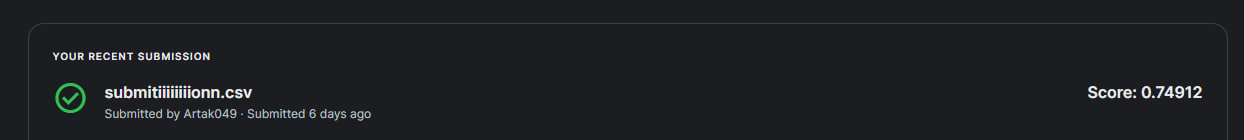

In [38]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

In [39]:
scaler = StandardScaler()
model = RandomForestClassifier()

In [40]:
pipe = Pipeline([('scaler', scaler), ('model', model)])

In [41]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [42]:
y_pred = pipe.predict(df_test)

In [43]:
df['Transported'] = y_pred

In [44]:
df.to_csv('submitionn.csv', index=False, index_label=False)